# RANDOM FOREST

Теорема Кардансье. Голосование большинства.

Средняя оценка по мнению толпы.

Бутстреп - тащим разные шарики из мешка.

Семплирование — обобщенное название методов манипуляции с начальной выборкой, которые позволяют выполнить структурно-параметрическую идентификацию наилучшей статистической модели случайного процесса. 

Сэмплирование – метод выбора подмножества наблюдаемых величин из данного множества, с целью выделения неких свойст исходного множества.

В качестве примера для доказательства работы модели мнения большинства, можно насэмплировать 5 выборок, обучить для них модели(ДЕРЕВЬЯ РЕШЕНИЙ) и сделать общее предсказание на основе всех 5ти деревьев.

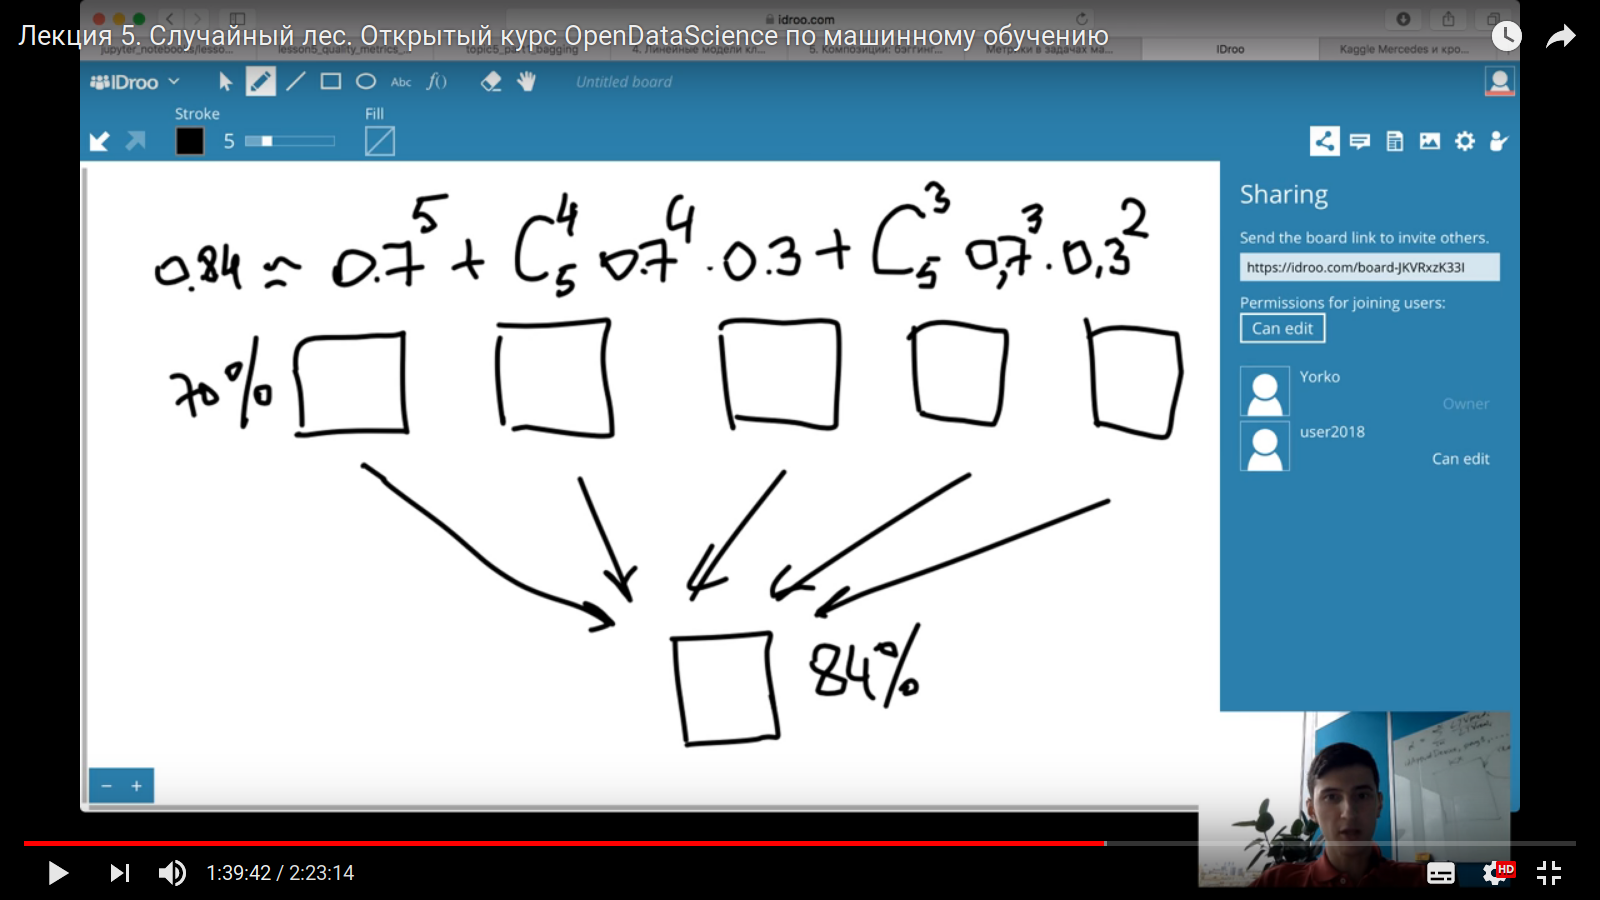

Можно взять все объекты, но взять не все признаки, а несколько. И обучить первое дерево.

Второе дерево будет обучаться на тех же объектах, но уже на других признаках!


**Случайный лес - объединение БУТСТРЭПА и метода СЛУЧАЙНЫХ ПОПРОСТРАНСТВ!**

Случайный лес обучает кучку деревьев, которая будет обучаться на различных признаках, и на бутстрэп выборке по объектам.

RANDOM PATCHING - из выборки берем некое подмножество признаков и объектов(клочок - patch) и на ней обучаем нашу модель. Но тут уже объекты могут повторяться. СЛУЧАЙНЫЙ ЛЕС ИСПОЛЬЗУЕТ подход RANDOM PATCHING.

То есть берется клочок выборки( объекты - признаки) и на этом клочке обучается.

**Ключевым гиперпараметром будет max_features( максимальное количество признаков)**


MAX_FEATURES - настраивается следующим образом




# MAX_FEATURES - настраивается следующим образом

БЕРТСЯ КВАДРАТНЫЙ КОРЕНЬ ИЗ ИСХОДНОГО ЧИСЛА ПРИЗНАКОВ

### Алгоритм

Алгоритм построения случайного леса, состоящего из $\large N$ деревьев, выглядит следующим образом:
* Для каждого $\large n = 1, \dots, N$:
     * Сгенерировать выборку $\large X_n$ с помощью bootstrap.
     * Построить решающее дерево $\large b_n$ по выборке $\large X_n$:
         — по заданному критерию мы выбираем лучший признак, делаем разбиение в дереве по нему и так до исчерпания выборки
         — дерево строится, пока в каждом листе не более $\large n_\text{min}$ объектов или пока не достигнем определенной высоты дерева
         — при каждом разбиении сначала выбирается $\large m$ случайных признаков из $\large n$ исходных, 
         и оптимальное разделение выборки ищется только среди них.
         
Итоговый классификатор $\large a(x) = \frac{1}{N}\sum_{i = 1}^N b_i(x)$, простыми словами — для задачи кассификации мы выбираем решение голосованием по большинству, а в задаче регрессии — средним.

Рекомендуется в задачах классификации брать $\large m = \sqrt{n}$, а в задачах регрессии — $\large m = \frac{n}{3}$, где $\large n$ — число признаков. Также рекомендуется в задачах классификации строить каждое дерево до тех пор, пока в каждом листе не окажется по одному объекту, а в задачах регрессии — пока в каждом листе не окажется по пять объектов.

Таким образом, случайный лес — это бэггинг над решающими деревьями, при обучении которых для каждого разбиения признаки выбираются из некоторого случайного подмножества признаков.

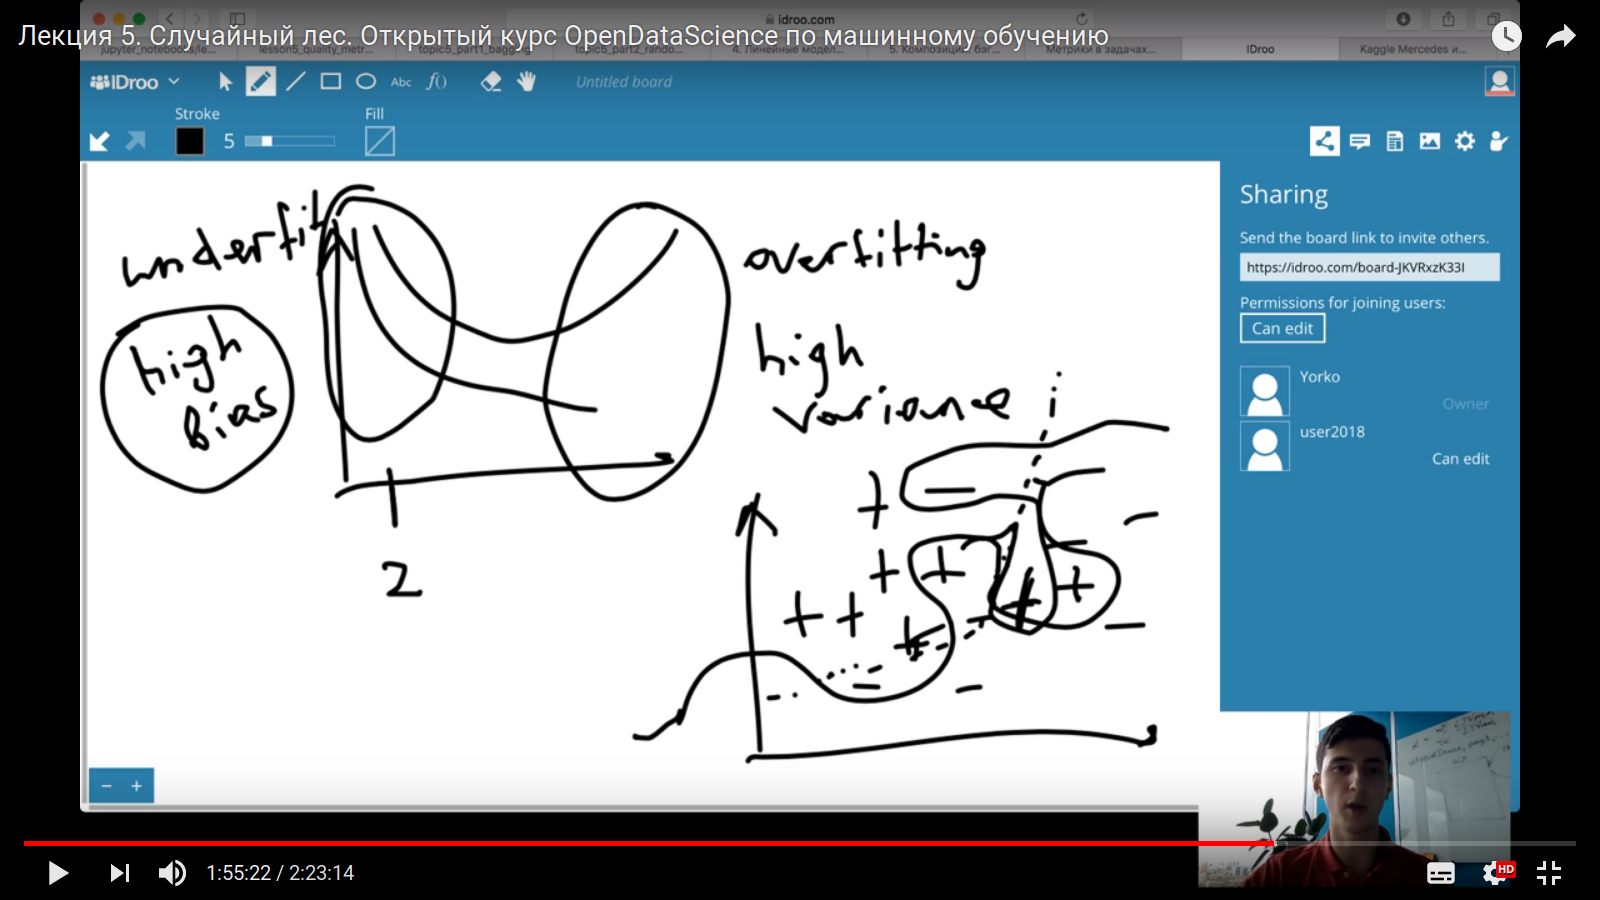


ПАРАМЕТР VARIENCE(дисперсия) - отвечает за то, что наша модель сможет быстро перестроиться, если будет какое-то изменение в тестовых данных.

СЛУЧАЙНЫЙ ЛЕС - знижает разброс композиции(дисперсию) VARIENCE.


# OOB - оценка Out-of-bag (Средняя ошибка на тех объектах которые не попадали в выборку) - используем для  RF


Когда мы много раз из нашей выборки набираем несколько других выборок(БУТСТРЭП(МАЛЫЕ) ВЫБОРКИ). Так мы набираем 63% - для обучения и 37% - для проверки.

То есть мы сразу можем оценить качество нашей модели, после каждой итерации Бэггинга, и взять среднее по всем итерациям БЭггинга и получить OOB - как среднюю ошибку на тех объектах которые не попадали в выборку.


И Бэггинг оценка является заменой КРОСС_ВАЛИДАЦИИ для алгоритма RANDOM FOREST


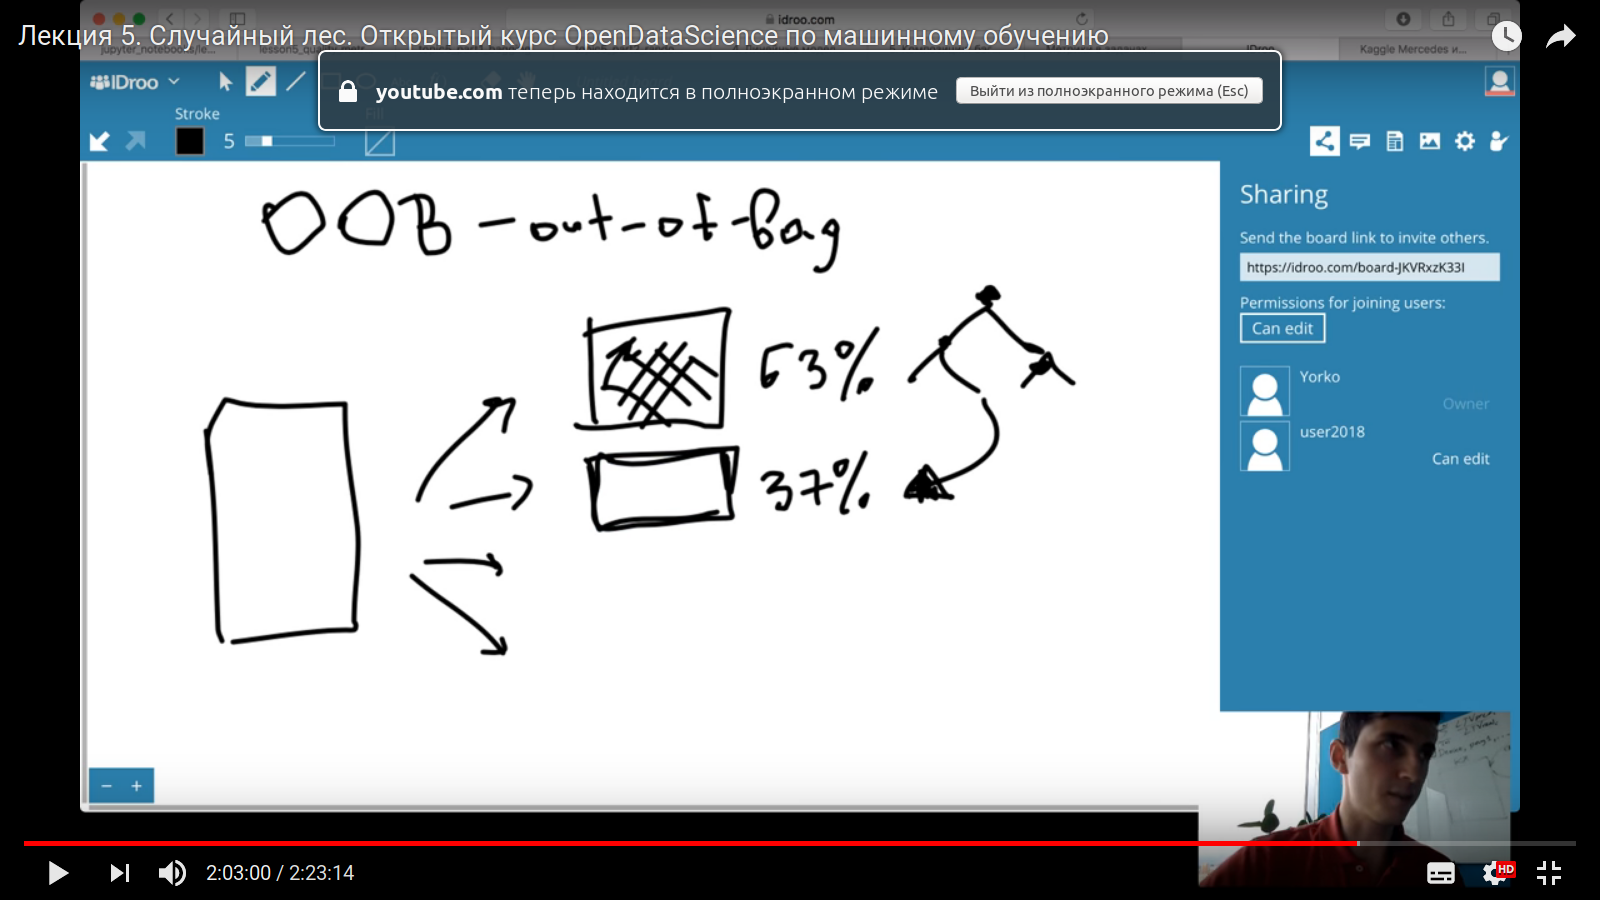

# Плюсы и минусы случайного леса(RF)


## Плюсы:

+ Не чувствительность к выбросам

+ малые требования к обработке данных

+ масштабирование данных(scale) не требуется, в отличие от линейных моделей

+ OOB оценка, прям на этапе обучения

+ ключевое преимущество - небольшая чувствительность гиперпараметров(OUT-of-the-box) (Будет хорошо работать даже без настройки гиперпараметров)

+ деревья обучаются независимо, поэтому данный процесс можно распараллелить и считать на нескольких машинах.

Гиперпараметры RF:

max_depth, max_features, n-estimators-число деревьев.

Деревья не чувствительны к гиперпараметрам, кроме тех что приведены выше, MAX_FEATURES -сколько признаков.

N-estimators - ключевой параметр и его надо улучшать, начать допустим на 10 деревьях, а потом на ночь поставить обучаться на 3000 деревьях и качество будешь как минимум не хуже, а даже лучше, а **переобучения НЕ БУДЕТ!!!!!!**

Таким образом N-estimators - не является параметром от которого зависит сложность модели! и поэтому не будет переобучения!

Увеличения числа деревьев, приводит к сглаживанию конечного ответа - то есть среднего по всем ответам деревьев и оно будет более гладким.

Наши деревья в лесу, запросто могут переобучаться и хватать точки по кривой, но когда мы возьмем среднее, у нас получится черная граница, прямая, как на рисунке: 


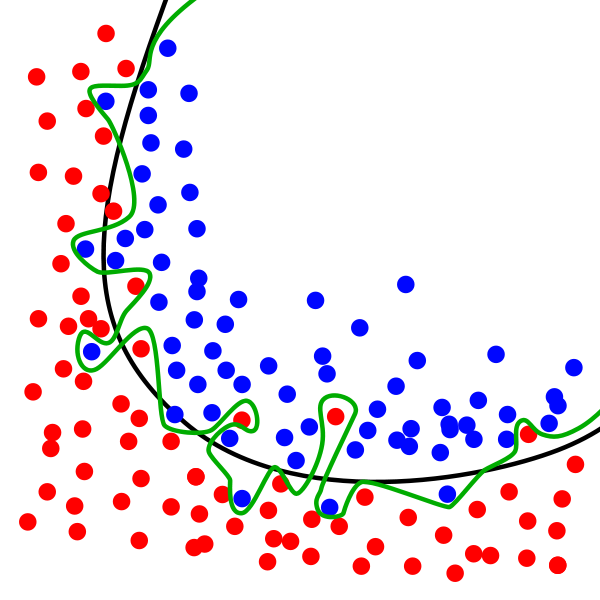



Поэтому мы можем создавать хоть сколько деревьев, и результат у нас будет только лучше!

# Минусы

- Время обучения, и нужна память для хранения деревьев( в оперативке) в отличие от бустинга!

- Когда признаки разрезжены(SPARSE) и когда признаков очень много! Подход BAG OF WORDS. Здесь уже нужна линейная модель.

- 

Разреженные даные(матрицы) - в которых присутствует множество нулей. 

Bag of words - каждому признаку мы придумываем слово.


# Из всего сказанного можно сделать вывод, что для задач классификации лучше сначала использовать алгоритм случайного леса и логистической регрессии. И посмотреть работает ли он?